In [1]:
#Importing all the packages that I will be needing

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Changing some default formating

pd.options.display.float_format = '{:.2f}'.format
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)

In [3]:
#Importing data that I will be working on

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
# Getting some idea about the dataset

df_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
# Getting some statistics about the variables and observations

df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [6]:
# Looking into all the variables and their data type

data = pd.DataFrame(columns=['Column_Name', 'Data_Type'])
data_col = []
data_type = []

for i in df_train.columns:
        
    data_col.append(i)
    data_type.append(df_train[i].dtypes)
    
data['Column_Name']= data_col
data['Data_Type']= data_type
    
data

,Column_Name,Data_Type
0,Id,int64
1,MSSubClass,int64
2,MSZoning,object
3,LotFrontage,float64
4,LotArea,int64
5,Street,object
6,Alley,object
7,LotShape,object
8,LandContour,object
9,Utilities,object


## Data Cleaning and Preprocessing

### I will do following things:

#### > Drop all the unnecessary variables
#### > Find out the missing values
#### > Change the data type for some variables as they are with wrong data type
#### > Drop variables if they have more than 80% missing value
#### > Drop observations if they have less than 5% of total data
#### > Do some feature engineering to fillup some of the missing values

In [7]:
# Drop all the unnecessary variables

df_train.drop(columns=['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df_test.drop(columns=['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [8]:
# Created a function that will tell us the percentage of data missing

def findMissingValue(df):
    data = pd.DataFrame(columns=['Columns','Number_Of_MValue','Percentage_Of_MValue'])
    
    data_col = []
    data_mValue = []
    data_perMValu = []
    
    for fn in df.columns:
        targetNum = len(df)
        x= df[fn].describe()[0]
        if x !=targetNum:
            missingValue = targetNum-x
            percentOfMV = round(float((missingValue/targetNum)*100),2)
            percentOfMV= str(percentOfMV) + ' '+ '%'
            
            data_col.append(fn)
            data_mValue.append(missingValue)
            data_perMValu.append(percentOfMV)
    
    data['Columns']=data_col
    data['Number_Of_MValue']=data_mValue
    data['Percentage_Of_MValue']=data_perMValu
    
    return data.sort_values('Number_Of_MValue',ascending=False).reset_index(drop=True)

In [9]:
# Executing the function to see if there is any missing value

findMissingValue(df_train)

,Columns,Number_Of_MValue,Percentage_Of_MValue
0,FireplaceQu,690.00,47.26 %
1,LotFrontage,259.00,17.74 %
2,GarageType,81.00,5.55 %
3,GarageYrBlt,81.00,5.55 %
4,GarageFinish,81.00,5.55 %
5,GarageQual,81.00,5.55 %
6,GarageCond,81.00,5.55 %
7,BsmtExposure,38.00,2.6 %
8,BsmtFinType2,38.00,2.6 %
9,BsmtQual,37.00,2.53 %


In [10]:
# Executing the function to see if there is any missing value

findMissingValue(df_test)

,Columns,Number_Of_MValue,Percentage_Of_MValue
0,FireplaceQu,730.00,50.03 %
1,LotFrontage,227.00,15.56 %
2,GarageYrBlt,78.00,5.35 %
3,GarageCond,78.00,5.35 %
4,GarageQual,78.00,5.35 %
5,GarageFinish,78.00,5.35 %
6,GarageType,76.00,5.21 %
7,BsmtCond,45.00,3.08 %
8,BsmtQual,44.00,3.02 %
9,BsmtExposure,44.00,3.02 %


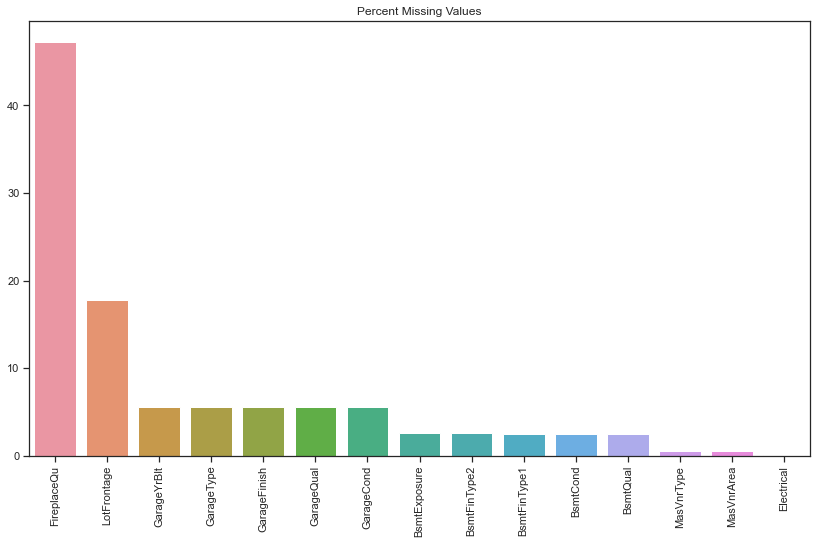

In [11]:
# Following graph is the visual representation of the percentage of data missing

percent = ((df_train.isnull().sum()/df_train.isnull().count()) * 100).sort_values(ascending=False)
percent = percent[percent>0]

plt.figure(figsize=(14,8))
plt.xticks(rotation=90); plt.title('Percent Missing Values')
sns.barplot(x=percent.index, y=percent)

In [12]:
# Removing data that contains less than 4% of missing value as we can drop 5% of observation if there is any missing value.

for i in df_train.columns:
    col_value = df_train[i].describe()[0]
    m_value = len(df_train) - col_value
    
    if m_value> 0.00:
        percntg_mvalue = m_value/len(df_train)
        if percntg_mvalue <= .05:
            #print(i+'  - '+ str(m_value))
            
            df_train.dropna(axis=0,subset=[i],inplace=True)

In [13]:
# Applying same for the test dataset

for i in df_test.columns:
    col_value = df_test[i].describe()[0]
    m_value = len(df_test) - col_value
    
    if m_value> 0.00:
        percntg_mvalue = m_value/len(df_test)
        if percntg_mvalue <= .05:
            #print(i+'  - '+ str(m_value))
            
            df_test.dropna(axis=0,subset=[i],inplace=True)

In [14]:
# Filling up FireplaceQu: Finding all the columns that consist of quality criteria

for i in df_train.columns:
    if 'qu' in i.lower():
        print(i)

OverallQual
ExterQual
BsmtQual
LowQualFinSF
KitchenQual
FireplaceQu
GarageQual


In [15]:
# Creating a function to convert all the rating into number from 0 to 6 for all the quality criteria

def convert_qual_to_num(df):
    for i in df[['FireplaceQu','OverallQual','ExterQual','BsmtQual','LowQualFinSF','KitchenQual','GarageQual']]:
        df[i].mask(df[i] == 'Ex', 5, inplace=True)
        df[i].mask(df[i] == 'Gd', 4, inplace=True)
        df[i].mask(df[i] == 'TA', 3, inplace=True)
        df[i].mask(df[i] == 'Fa', 2, inplace=True)
        df[i].mask(df[i] == 'Po', 1, inplace=True)
        df[i].mask(df[i] == 'NA', 0, inplace=True)

In [16]:
# Converting quality criteria from char to num

convert_qual_to_num(df_train)
convert_qual_to_num(df_test)

In [17]:
# Finding the mean for each rating point based on all the quality criteria

for i in range(5):
    mean_value = df_train[df_train['FireplaceQu']==(i+1)][['OverallQual','ExterQual','BsmtQual','KitchenQual','GarageQual']].sum(axis=1).unique().mean()
    print('The mean value for rating '+str(i+1)+' is - '+str(round(mean_value,2)))

The mean value for rating 1 is - 15.33
The mean value for rating 2 is - 20.0
The mean value for rating 3 is - 20.36
The mean value for rating 4 is - 21.0
The mean value for rating 5 is - 23.5


In [18]:
# Creating a function to fillup the missing value based on mean value of all other quality criteria

def fillup_mValue_fireplace(df):
    
    mask = (df['FireplaceQu'].isna()) & df[['OverallQual','ExterQual','BsmtQual','KitchenQual','GarageQual']].sum(axis=1)>=23
    df['FireplaceQu'][mask] = 5
    mask = (df['FireplaceQu'].isna()) & df[['OverallQual','ExterQual','BsmtQual','KitchenQual','GarageQual']].sum(axis=1)>=20
    df['FireplaceQu'][mask] = 4
    mask = (df['FireplaceQu'].isna()) & df[['OverallQual','ExterQual','BsmtQual','KitchenQual','GarageQual']].sum(axis=1)>=17
    df['FireplaceQu'][mask] = 3
    mask = (df['FireplaceQu'].isna()) & df[['OverallQual','ExterQual','BsmtQual','KitchenQual','GarageQual']].sum(axis=1)>=15
    df['FireplaceQu'][mask] = 2
    mask = (df['FireplaceQu'].isna()) & df[['OverallQual','ExterQual','BsmtQual','KitchenQual','GarageQual']].sum(axis=1)>=5
    df['FireplaceQu'][mask] = 1
    mask = (df['FireplaceQu'].isna()) & df[['OverallQual','ExterQual','BsmtQual','KitchenQual','GarageQual']].sum(axis=1)<5
    df['FireplaceQu'][mask] = 0

In [19]:
#Filling up the missing value for "FireplaceQu"

fillup_mValue_fireplace(df_train)
fillup_mValue_fireplace(df_test)

In [20]:
# Filling up the missing value for "LotFrontage" with mean value

df_train['LotFrontage'].fillna(value=df_train[df_train['LotFrontage'].notna()]['LotFrontage'].mean(),axis=0,inplace=True)
df_test['LotFrontage'].fillna(value=df_test[df_test['LotFrontage'].notna()]['LotFrontage'].mean(),axis=0,inplace=True)

In [21]:
# Filling up the missing value for "GarageYrBlt" with "YrBlt" value

df_train['GarageYrBlt'].fillna(value=df_train['YearBuilt'],axis=0,inplace=True)
df_test['GarageYrBlt'].fillna(value=df_test['YearBuilt'],axis=0,inplace=True)

In [22]:
# Finding out if all the columns that have missing values in it are float/int or object data type.


m_value = findMissingValue(df_train)

col = m_value['Columns']

data = pd.DataFrame(columns=['Column_Name', 'Data_Type'])
data_col = []
data_type = []

for i in col:
        
    data_col.append(i)
    data_type.append(df_train.select_dtypes(include=['float', 'int']).dtypes[1])
    
data['Column_Name']= data_col
data['Data_Type']= data_type
    
data

,Column_Name,Data_Type
0,GarageType,float64
1,GarageFinish,float64
2,GarageQual,float64
3,GarageCond,float64


In [23]:
# Changing data type for following columns since they don't have correct data type.

col = ['GarageType','GarageFinish','GarageCond']

for i in col:
    df_train[i] = df_train[i].astype(str)
    df_test[i] = df_test[i].astype(str)

In [24]:
# Filling up the missing value for "GarageQual" with 0.

df_train['GarageQual'].fillna(value=0,axis=0,inplace=True)
df_test['GarageQual'].fillna(value=0,axis=0,inplace=True)

In [25]:
findMissingValue(df_train)

,Columns,Number_Of_MValue,Percentage_Of_MValue


In [26]:
findMissingValue(df_test)

,Columns,Number_Of_MValue,Percentage_Of_MValue


# Exploratory Data Analysis:

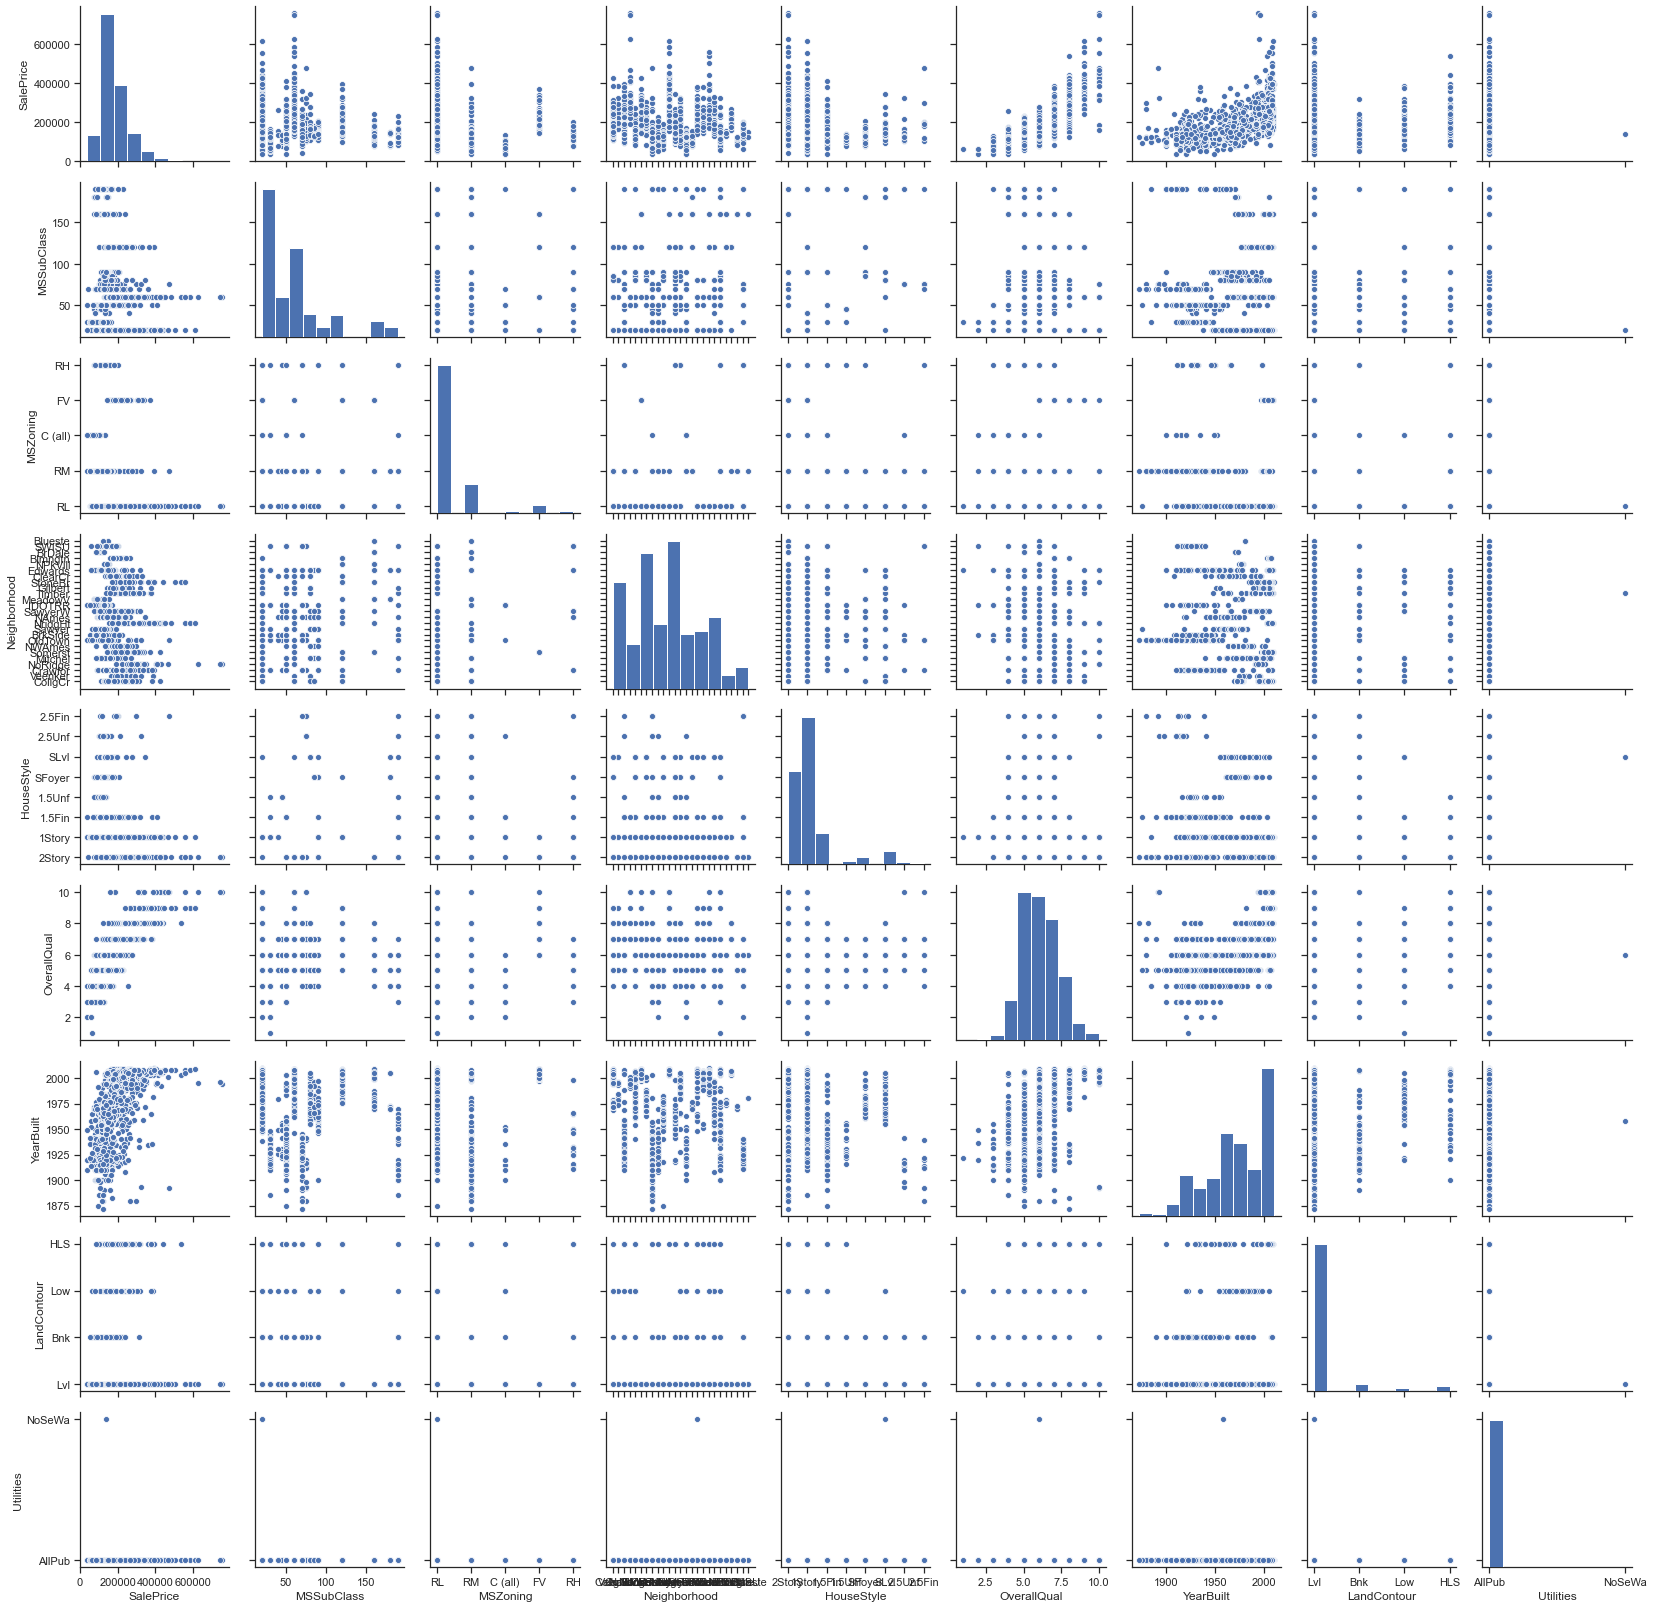

In [27]:
# Following are pairplots to get the overall idea.

g = sns.pairplot(df_train, vars=['SalePrice','MSSubClass','MSZoning','Neighborhood','HouseStyle',
                                 'OverallQual','YearBuilt','LandContour','Utilities'])

In [28]:
# Sales price based on Neighborhood

(df_train.groupby('Neighborhood').std()['SalePrice']/df_train.groupby('Neighborhood').mean()['SalePrice']).nlargest(n=10).iplot(kind='bar')

In [29]:
# Sales price based on overall quality

(df_train.groupby('OverallQual').std()['SalePrice']/df_train.groupby('OverallQual').mean()['SalePrice']).nlargest(n=10).iplot(kind='bar')

In [30]:
# Sales price based on year built

df_train.iplot(kind='bar',x='YearBuilt',y='SalePrice',bins=30)

In [31]:
# Sales price based on land contour

(df_train.groupby('LandContour').std()['SalePrice']/df_train.groupby('LandContour').mean()['SalePrice']).nlargest(n=10).iplot(kind='bar')

In [32]:
# Sales price based on utilities

df_train.iplot(kind='bar',x='Utilities',y='SalePrice',gridcolor='blue',bins=30)

# Data preparation for building predictive model

In [33]:
# Taking two backups

df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [34]:
# Removing id column as I don't need it in my analysis.

df_train.drop(columns=['Id'],axis=1,inplace=True)
df_test.drop(columns=['Id'],axis=1,inplace=True)

In [35]:
# Getting dummy variables

df_train = pd.get_dummies(df_train,drop_first=True)
df_test= pd.get_dummies(df_test,drop_first=True)

In [36]:
# Checking the number of columns df_train dataset has

df_train.columns.nunique()

229

In [37]:
# Checking the number of columns df_test dataset has

df_test.columns.nunique()

205

In [38]:
# Checking the columns that don't match

df_train.columns.difference(df_test.columns)

Index(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_CBlock', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock',
       'Exterior2nd_Other', 'Exterior2nd_Stone', 'Functional_Sev',
       'GarageCond_nan', 'GarageFinish_nan', 'GarageType_nan', 'Heating_Grav',
       'Heating_OthW', 'HouseStyle_2.5Fin', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'SalePrice',
       'Utilities_NoSeWa'],
      dtype='object')

In [39]:
# Removing additional columns that don't match.

df_train.drop(columns=['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_CBlock', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock',
       'Exterior2nd_Other', 'Exterior2nd_Stone', 'Functional_Sev',
       'GarageCond_nan', 'GarageFinish_nan', 'GarageType_nan', 'Heating_Grav',
       'Heating_OthW', 'HouseStyle_2.5Fin', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'Utilities_NoSeWa'],axis=1,inplace=True)

In [40]:
# Checking again the number of columns df_train dataset has

df_train.columns.nunique()

206

In [41]:
# Checking again the number of columns df_test dataset has

df_test.columns.nunique()

205

## Building Machine Learning Algorithm

In [42]:
# Defining dependent and independent variables.

X= df_train.drop(['SalePrice'],axis=1)
y= df_train['SalePrice']

In [43]:
# Importing train_test_split and metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
# Train-Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [45]:
# Importing model, building algorithm and creating classification report

from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.linear_model import LogisticRegression

#Create an object of the classifier.
bbc_lr = BalancedBaggingClassifier(base_estimator=LogisticRegression(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=1)

y_train = df_train['SalePrice']
X_train = df_train.drop(['SalePrice'], axis=1, inplace=False)

#Train the classifier.
bbc_lr.fit(X_train, y_train)


prediction = bbc_lr.predict(X_test)

bbc_lr.score(X_test,y_test)
print('The Logistic Regression Accuracy is {:.2f} %'.format(bbc_lr.score(X_test,y_test)*100))

print('\n')

print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

The Logistic Regression Accuracy is 66.78 %


              precision    recall  f1-score   support

       34900       1.00      1.00      1.00         1
       40000       0.00      0.00      0.00         0
       52500       1.00      1.00      1.00         1
       58500       1.00      1.00      1.00         1
       60000       1.00      1.00      1.00         2
       62383       0.00      0.00      0.00         0
       66500       1.00      1.00      1.00         1
       67000       1.00      1.00      1.00         1
       73000       1.00      1.00      1.00         1
       81000       1.00      1.00      1.00         2
       82500       0.67      1.00      0.80         2
       83500       1.00      1.00      1.00         1
       85000       1.00      1.00      1.00         1
       85400       1.00      1.00      1.00         1
       87000       0.00      0.00      0.00         1
       88000       0.00      0.00      0.00         1
       89500       1.00      1.00  

In [46]:
# Importing model, building algorithm and creating classification report

from sklearn.tree import DecisionTreeClassifier

#Create an object of the classifier.
bbc_dt = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

y_train = df_train['SalePrice']
X_train = df_train.drop(['SalePrice'], axis=1, inplace=False)

#Train the classifier.
bbc_dt.fit(X_train, y_train)

prediction = bbc_dt.predict(X_test)

bbc_dt.score(X_test,y_test)
print('The Decision Tree Accuracy is {:.2f} %'.format(bbc_dt.score(X_test,y_test)*100))

print('\n')

print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

The Decision Tree Accuracy is 69.26 %


              precision    recall  f1-score   support

       34900       0.25      1.00      0.40         1
       40000       0.00      0.00      0.00         0
       52000       0.00      0.00      0.00         0
       52500       1.00      1.00      1.00         1
       55993       0.00      0.00      0.00         0
       58500       1.00      1.00      1.00         1
       60000       0.67      1.00      0.80         2
       61000       0.00      0.00      0.00         0
       62383       0.00      0.00      0.00         0
       66500       0.33      1.00      0.50         1
       67000       1.00      1.00      1.00         1
       68500       0.00      0.00      0.00         0
       73000       1.00      1.00      1.00         1
       75000       0.00      0.00      0.00         0
       79000       0.00      0.00      0.00         0
       81000       1.00      1.00      1.00         2
       82500       1.00      1.00      1.

In [47]:
# Importing model, building algorithm and creating classification report

from sklearn.ensemble import RandomForestClassifier
#Create an object of the classifier.
bbc_rf = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

y_train = df_train['SalePrice']
X_train = df_train.drop(['SalePrice'], axis=1, inplace=False)

#Train the classifier.
bbc_rf.fit(X_train, y_train)

prediction = bbc_rf.predict(X_test)

bbc_rf.score(X_test,y_test)
print('The Random Forest Accuracy is {:.2f} %'.format(bbc_rf.score(X_test,y_test)*100))

print('\n')

print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

The Random Forest Accuracy is 81.27 %


              precision    recall  f1-score   support

       34900       1.00      1.00      1.00         1
       52500       1.00      1.00      1.00         1
       58500       1.00      1.00      1.00         1
       60000       1.00      1.00      1.00         2
       64500       0.00      0.00      0.00         0
       66500       1.00      1.00      1.00         1
       67000       1.00      1.00      1.00         1
       73000       1.00      1.00      1.00         1
       76500       0.00      0.00      0.00         0
       81000       1.00      1.00      1.00         2
       82500       1.00      1.00      1.00         2
       83500       0.50      1.00      0.67         1
       85000       0.00      0.00      0.00         1
       85400       0.50      1.00      0.67         1
       87000       1.00      1.00      1.00         1
       88000       0.00      0.00      0.00         1
       89500       1.00      1.00      1.

In [48]:
# Importing model, building algorithm and creating classification report

from sklearn.svm import SVC
#Create an object of the classifier.
bbc_sv = BalancedBaggingClassifier(base_estimator=SVC(random_state=1),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=1)

y_train = df_train['SalePrice']
X_train = df_train.drop(['SalePrice'], axis=1, inplace=False)

#Train the classifier.
bbc_sv.fit(X_train, y_train)

prediction = bbc_sv.predict(X_test)

bbc_sv.score(X_test,y_test)
print('The Support Vector Accuracy is {:.2f} %'.format(bbc_sv.score(X_test,y_test)*100))

print('\n')

print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

The Support Vector Accuracy is 42.76 %


              precision    recall  f1-score   support

       34900       1.00      1.00      1.00         1
       40000       0.00      0.00      0.00         0
       52500       1.00      1.00      1.00         1
       58500       1.00      1.00      1.00         1
       60000       1.00      0.50      0.67         2
       66500       1.00      1.00      1.00         1
       67000       1.00      1.00      1.00         1
       73000       1.00      1.00      1.00         1
       81000       0.00      0.00      0.00         2
       82500       1.00      0.50      0.67         2
       83500       1.00      1.00      1.00         1
       85000       0.00      0.00      0.00         1
       85400       1.00      1.00      1.00         1
       87000       0.00      0.00      0.00         1
       88000       0.00      0.00      0.00         1
       89500       1.00      1.00      1.00         1
       92000       1.00      1.00      1

# Saving the Model

### Since Random Forest has the highest accuracy rate, I am saving this model

In [49]:
# Saving Model
import pickle
saved_model = pickle.dumps(bbc_rf)

In [50]:
# Load the Pickled model
bbc_rf_from_pickle = pickle.loads(saved_model)

In [51]:
# Using the loaded pickle model to make predictions
df_test['SalePrice']= bbc_rf_from_pickle.predict(df_test)

In [52]:
# creating the new "Salesprice" column on df_test_copy dataset

df_test_copy['SalePrice']=df_test['SalePrice']

In [54]:
# New sales price for all IDs.

df_test_copy[['Id','SalePrice']]

,Id,SalePrice
0,1461,129900
1,1462,151500
2,1463,176500
3,1464,183200
4,1465,236500
5,1466,165600
6,1467,173000
7,1468,169000
8,1469,173000
9,1470,143250
